# CT Images Denoising - Deep Learning Models

Description of the jupyter notebook and maybe brief overview of the all project.

**Authors:** [Raphaël Achddou](https://people.epfl.ch/raphael.achddou) ([contact](mailto:raphael.achddou@epfl.ch)), [Paulo Ribeiro](https://people.epfl.ch/paulo.ribeirodecarvalho) ([contact](mailto:paulo.ribeirodecarvalho@epfl.ch))

**References:**
[1] FFDNet: Toward a Fast and Flexible Solution for CNN based Image Denoising ([link](https://arxiv.org/abs/1710.04026))
[2] Plug-and-Play Image Restoration with Deep Denoiser Prior ([link](https://arxiv.org/abs/2008.13751))
[3] Beyond a Gaussian Denoiser: Residual Learning of Deep CNN for Image Denoising ([link](https://arxiv.org/abs/1608.03981))
[4] An Analysis and Implementation of the FFDNet Image Denoising Method ([link](http://www.ipol.im/pub/art/2019/231/))
[5] Github from paper author cszn ([link](https://github.com/cszn/KAIR))

## Import

In [1]:
import os
import torch
import numpy as np

from PIL import Image
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import v2
from models.cnn_viewer import CnnViewer
from models.noises import gaussian, pixel_intensity_adaptive

%load_ext autoreload
%autoreload 2

to_pil = transforms.functional.to_pil_image
to_float = v2.ToDtype(torch.float32, scale=False)

## Load Data

In [2]:
test_ct_image_folder = 'data/test/ct_images' 

## Models

In this work, we will be using three architecture from the simpler to the more accurate model. We start with the DNCNN [[1](https://github.com/cszn/KAIR/blob/master/main_train_dncnn.py), [2](https://github.com/cszn/DnCNN/tree/master/TrainingCodes/dncnn_pytorch)], followed by the FFDNET [[3](http://www.ipol.im/pub/art/2019/231/)] and finally with DRUNET [[4](https://github.com/cszn/DPIR)].

Let's maybe use models that have been made for the Grand Challenge.
RED-CNN [[5](https://github.com/SSinyu/RED-CNN)]
CT-FORMER [[6](https://github.com/wdayang/CTformer)]

summary of few methods and their papers [here](https://github.com/SSinyu/CT-Denoising-Review/blob/master/README.md).

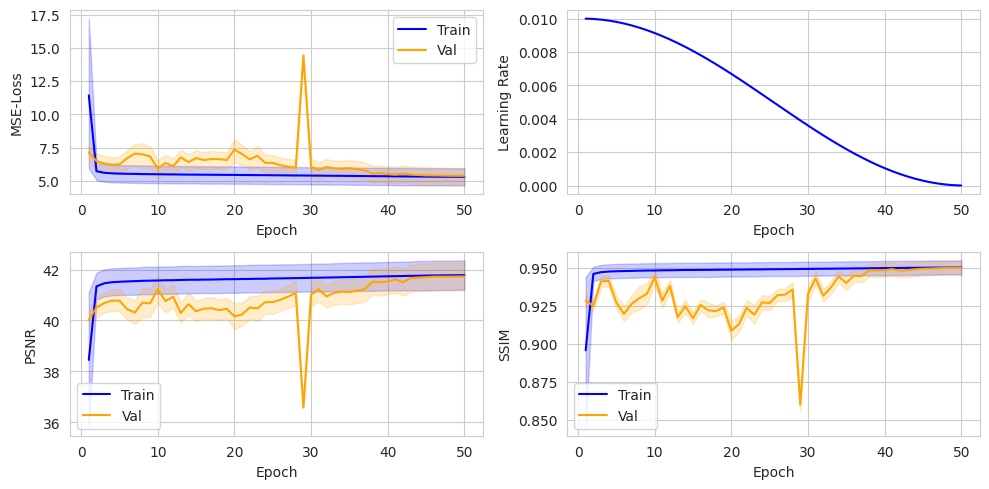

In [3]:
cnn = CnnViewer(model_path='models/dncnn/2024-04-12 20h52m14s/training_save_epoch_50.tar',
                model_name='DnCNN',
                device='cuda')

cnn.print_training_stats()

In [4]:
perf, data, target, prediction = cnn.test(test_ct_path=test_ct_image_folder, 
                                          add_noise=lambda x: gaussian(x, var=20))

# Display mean performance
print("Results (init):\n", 
      f"MSE:  {np.mean(perf['mse']['init']):.2f},", 
      f"PSNR: {np.mean(perf['psnr']['init']):.2f},", 
      f"SSIM: {np.mean(perf['ssim']['init']):.2f}")

print("Results (final):\n", 
      f"MSE:  {np.mean(perf['mse']['final']):.2f},", 
      f"PSNR: {np.mean(perf['psnr']['final']):.2f},", 
      f"SSIM: {np.mean(perf['ssim']['final']):.2f}")

Progress of predictions: 222it [01:22,  2.70it/s]                         

Results (init):
 MSE:  17.48, PSNR: 35.73, SSIM: 0.84
Results (final):
 MSE:  5.28, PSNR: 41.81, SSIM: 0.95


## Results

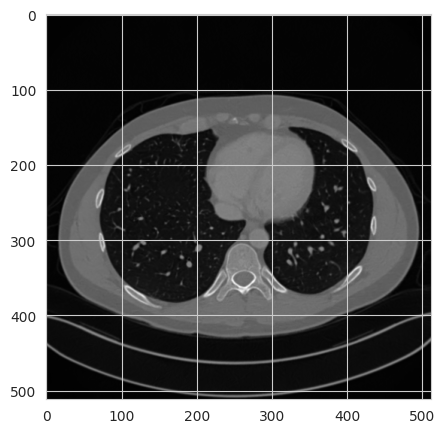

In [7]:
import matplotlib.pyplot as plt

idx = 0

plt.figure(figsize=(5,5))
plt.imshow(prediction[idx], cmap='grey')
plt.show()